<a href="https://colab.research.google.com/github/khondokarsumaya/210101_decision_tree/blob/main/210101_decisionmtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/khondokarsumaya/210101_decision_tree/main/heart.csv"


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

In [30]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/khondokarsumaya/210101_decision_tree/main/heart.csv"
df = pd.read_csv(GITHUB_RAW_URL)
print("Dataset loaded successfully")
print(df.shape)
df.head()

Dataset loaded successfully
(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
print(df.columns)
print(df.dtypes)
print(df.isnull().sum())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
df = df.dropna()

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop('target', axis=1)
y = df['target']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
cart = DecisionTreeClassifier(criterion='gini', random_state=42)
param_grid = {'max_depth': [2, 4, 6, 8, 10],'min_samples_split': [2, 5, 10]}
grid_cart = GridSearchCV(cart, param_grid, cv=5)
grid_cart.fit(X_train, y_train)
best_cart = grid_cart.best_estimator_

In [36]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
grid_id3 = GridSearchCV(id3, param_grid, cv=5)
grid_id3.fit(X_train, y_train)
best_id3 = grid_id3.best_estimator_

In [37]:
y_pred_cart = best_cart.predict(X_test)
y_pred_id3 = best_id3.predict(X_test)
y_prob_cart = best_cart.predict_proba(X_test)[:,1]
y_prob_id3 = best_id3.predict_proba(X_test)[:,1]

In [44]:
X2 = X.iloc[:, :2].values
y2 = y.values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

cart_2d = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_cart.max_depth,
    min_samples_split=best_cart.min_samples_split,
    random_state=42
)

id3_2d = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=best_id3.max_depth,
    min_samples_split=best_id3.min_samples_split,
    random_state=42
)

cart_2d.fit(X2_train, y2_train)
id3_2d.fit(X2_train, y2_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

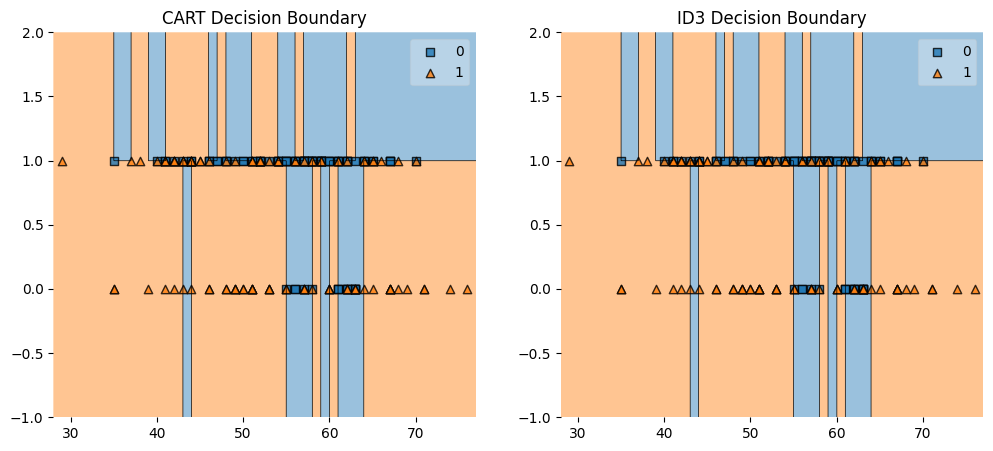

In [45]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_decision_regions(X2_test, y2_test, clf=cart_2d)
plt.title('CART Decision Boundary')

plt.subplot(1,2,2)
plot_decision_regions(X2_test, y2_test, clf=id3_2d)
plt.title('ID3 Decision Boundary')

plt.show()



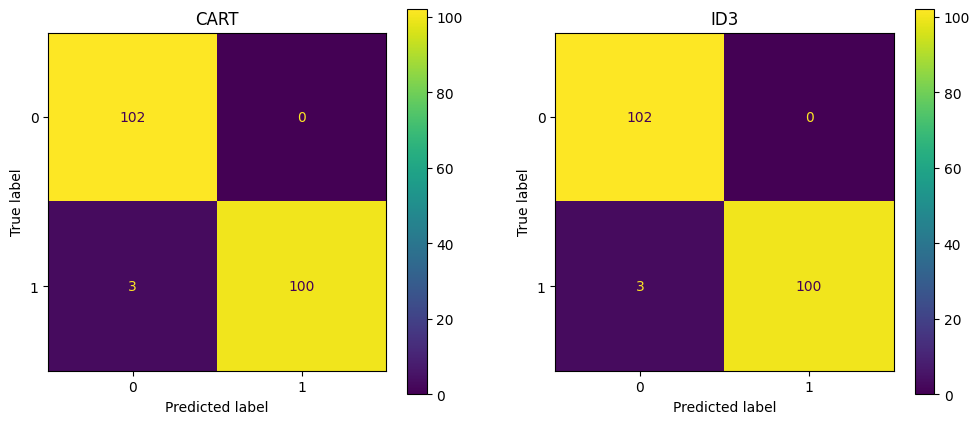

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_cart)).plot(ax=ax[0])
ax[0].set_title('CART')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_id3)).plot(ax=ax[1])
ax[1].set_title('ID3')
plt.show()

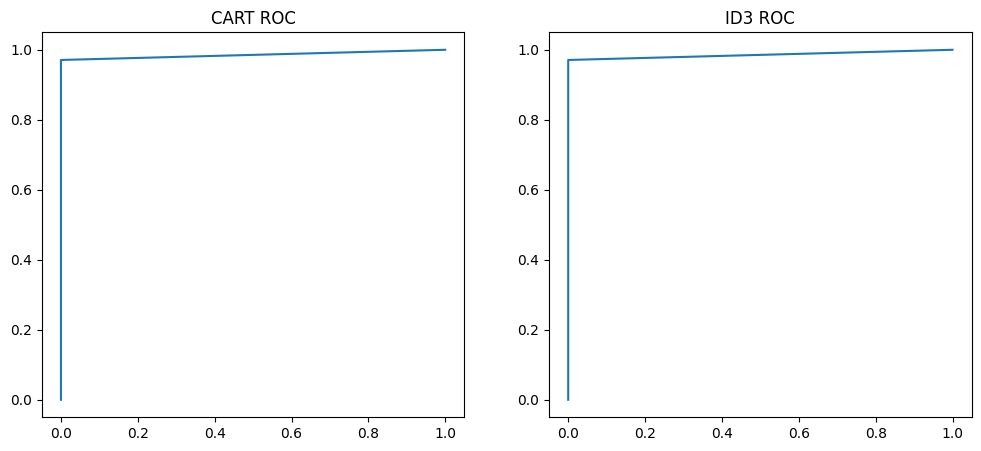

In [47]:
fpr_c, tpr_c, _ = roc_curve(y_test, y_prob_cart)
fpr_i, tpr_i, _ = roc_curve(y_test, y_prob_id3)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr_c, tpr_c)
plt.title('CART ROC')
plt.subplot(1,2,2)
plt.plot(fpr_i, tpr_i)
plt.title('ID3 ROC')
plt.show()

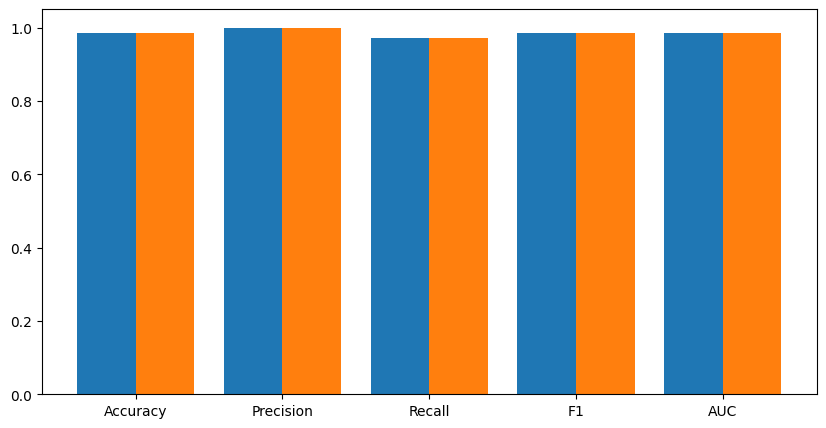

In [48]:
metrics = ['Accuracy','Precision','Recall','F1','AUC']
cart_scores = [accuracy_score(y_test, y_pred_cart),precision_score(y_test, y_pred_cart),recall_score(y_test, y_pred_cart),f1_score(y_test, y_pred_cart),auc(fpr_c, tpr_c)]
id3_scores = [accuracy_score(y_test, y_pred_id3),precision_score(y_test, y_pred_id3),recall_score(y_test, y_pred_id3),f1_score(y_test, y_pred_id3),auc(fpr_i, tpr_i)]
x = np.arange(len(metrics))
plt.figure(figsize=(10,5))
plt.bar(x-0.2, cart_scores, width=0.4)
plt.bar(x+0.2, id3_scores, width=0.4)
plt.xticks(x, metrics)
plt.show()

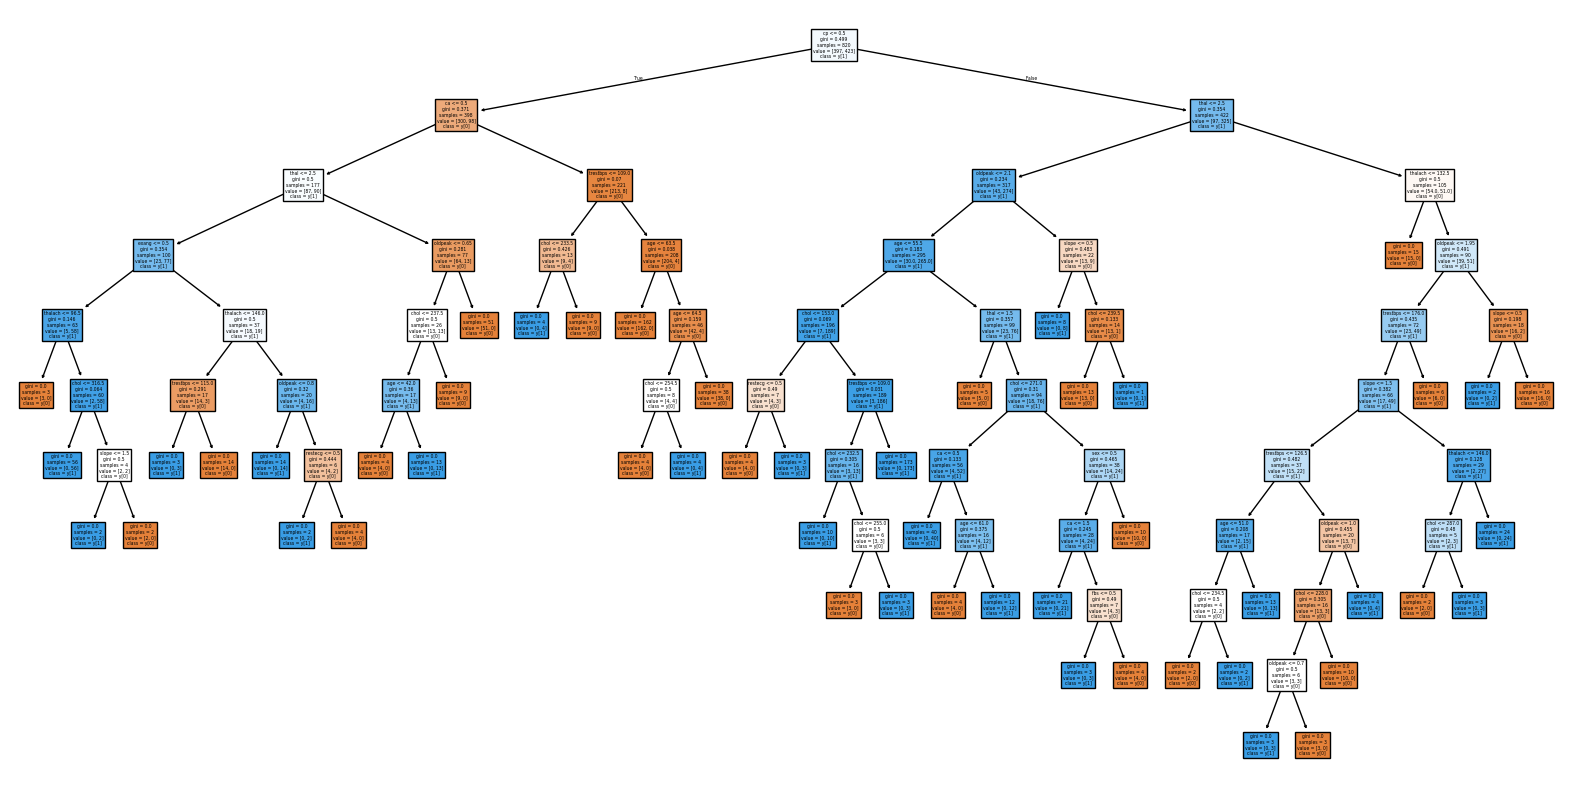

In [49]:
plt.figure(figsize=(20,10))
plot_tree(best_cart, feature_names=X.columns, class_names=True, filled=True)
plt.show()